<a href="https://colab.research.google.com/github/karunya-145/ACM-30-Day-Challenge-Karunya/blob/main/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving mental_health_workplace_survey.csv to mental_health_workplace_survey.csv
User uploaded file "mental_health_workplace_survey.csv" with length 371354 bytes


In [12]:
# Import all necessary libraries
import pandas as pd                 # For data manipulation
import numpy as np                  # For numerical computations
import seaborn as sns               # For advanced visualizations
import matplotlib.pyplot as plt     # For basic plotting
import warnings
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Example classifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Settings to improve readability
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


In [5]:
# Load the dataset
df = pd.read_csv("mental_health_workplace_survey.csv")  # Replace with your local file path if needed

# Preview first few rows
df.head(25)


,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,5.06,9.47,4.16,7.0,7.9,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,2.00,5.65,3.74,7.2,9.0,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,7.17,5.70,8.80,5.2,9.7,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,3.76,6.40,4.69,8.7,5.8,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,2.34,3.41,2.12,4.2,3.3,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1
5,1006,44,Prefer not to say,Germany,Project Manager,Support,3,58,Hybrid,3.12,4.81,4.45,1.09,8.5,3.2,23,Yes,2.56,No,6,40K-60K,5.06,38,4.32,0
6,1007,32,Prefer not to say,USA,Software Engineer,Engineering,17,30,Hybrid,5.15,9.68,5.98,7.50,5.9,3.8,62,No,4.54,Yes,9,100K+,6.91,12,9.76,0
7,1008,32,Male,Canada,Customer Support,Marketing,4,39,No,5.25,4.70,9.48,7.43,7.6,6.1,77,Yes,4.47,No,3,80K-100K,2.28,22,7.38,0
8,1009,45,Prefer not to say,Canada,Marketing Manager,Sales,5,49,Hybrid,4.07,4.13,6.78,4.76,7.3,4.9,112,No,3.57,No,3,80K-100K,7.87,3,4.33,0
9,1010,57,Prefer not to say,Brazil,Software Engineer,Engineering,6,59,Hybrid,9.59,5.00,4.00,2.14,4.8,6.5,40,Yes,9.99,No,2,60K-80K,2.16,19,4.98,1


# Train:

•    Logistic Regression

•    Linear Discriminant Analysis (LDA)

<br/>


--------------------------
------------------------------


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('BurnoutRisk', axis=1)
y = df['BurnoutRisk']

# checking for categorical columns
categ_cols = df.select_dtypes(include='object').columns
#print(categ_cols)

# One-Hot Encoder #
from sklearn.preprocessing import OneHotEncoder
categ_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categ_cols, drop_first=True)

numeric_df = df.select_dtypes(include='number')
corr_matrix1 = numeric_df.corr()
original_data = corr_matrix1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[original_data.columns])

scaled_data = df[original_data.columns]

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

# Evaluate with:

•    Accuracy

•    Confusion Matrix

•    ROC-AUC (plot ROC curve)

<br/>

--------------------------
------------------------------

Accuracy: 1.0000

Confusion Matrix:
[[399   0]
 [  0 201]]

ROC AUC Score: 1.0000


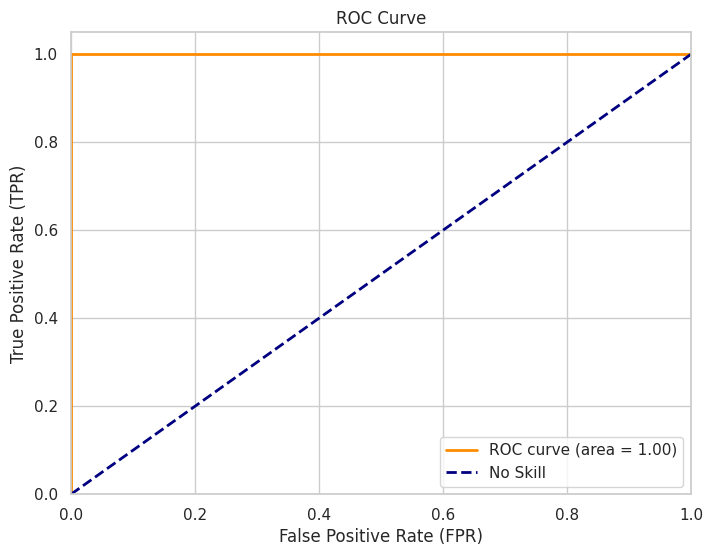

In [20]:
# make Predictions
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1] # Probabilities for the positive class

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

- The accuracy and AUC-ROC scores of Logistic Regression is anyways greater than the LDA which makes the Logistic regression a better model.